In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import regex as re
import src.cleanfun as cf
import plotly.express as px
import plotly.express as px
import plotly.graph_objects as go

In [71]:
#configuracioens de visualización
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

sns.set_context = ("poster")
sns.set(rc={"figure.figsize":(12.,6.)})
sns.set_style("whitegrid")

In [72]:
sharks = pd.read_csv("data/sharks.csv")

In [73]:
sharks.columns

Index(['Unnamed: 0', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Sex', 'Age', 'Injury', 'Fatal', 'Time', 'Species',
       'Year_D', 'Month_D', 'Act', 'Boat', 'Injur_Type', 'Spec'],
      dtype='object')

# Hipótesis
- hipotesis 1 los ataques de tiburones han icrmentado según han ido avanzando los años
- hipótesis 2 los ataquesde tiburones atacan más a embarcaciones que a nadadores
- [hipóstesis 3 Florida es la capital mundial de los ataques de tiburones](https://www.lavanguardia.com/ocio/viajes/20210407/6631447/6-playas-mas-peligrosas-mundo.html)
- [hipótesis 4 ¿Es posible el ataque de tiburón en la costa española?](https://www.mundo-geo.es/naturaleza/es-posible-ataque-tiburon-en-costa-espanola_238643_102.html)

## hipotesis 1 los ataques de tiburones han icrmentado según han ido avanzando los años

In [74]:
anual = sharks[(sharks.Year_D != "UNKNOWN")]

In [75]:
anual.Year_D.value_counts()

2015    130
2016    122
2017    122
2014    119
2011    118
       ... 
1792      1
1791      1
1787      1
1786      1
1543      1
Name: Year_D, Length: 240, dtype: int64

anual = sharks[(sharks["Year_D"] > '1950')&(sharks.Year_D != "UNKNOWN")]

anual["Year_D"].value_counts()

#fig = px.bar(penguins, x=penguins.species.value_counts().index, y=penguins.species.value_counts().values)

fig = px.line(anual, x=anual["Year_D"].value_counts().index, y=anual["Year_D"].value_counts().values)

fig.show()

/home/sinatxe/anaconda3/envs/ironhack/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



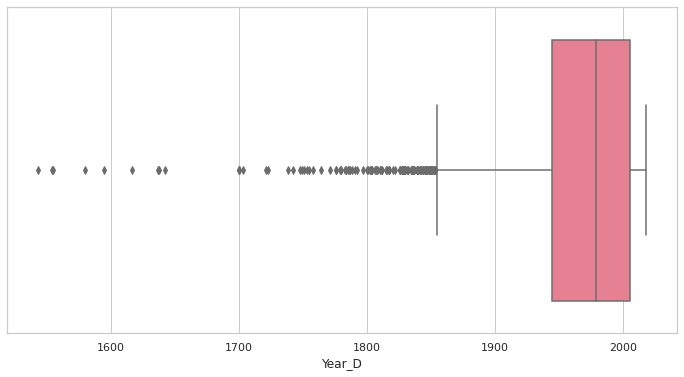

In [76]:
#mostrar outlayers para dejar fuera esos datos si fuera necesario
#attacks_Year.Year_D = attacks_Year.Year_D.astype(dtype="int64")
#sns.boxplot(x="Year_D", data = attacks_Year,palette ="husl");
anual.Year_D = anual.Year_D.astype(dtype = "int64")
sns.boxplot(x = "Year_D",data = anual,palette ="husl");

In [77]:
#el gráfico anterior muestra que el grueso de ataques empieza sobre 1950
#df2 = df[df["region"] == "Boston"]
anual = anual[anual.Year_D > 1950]
attacks_Year= anual.groupby('Year_D')['Activity'].count().reset_index()
attacks_Year
fig = px.line(attacks_Year,x="Year_D", y ="Activity")

In [78]:
fig.show()

## hipótesis 2 los ataquesde tiburones atacan más a embarcaciones que a nadadores

#### 

In [79]:
Tipo = anual.groupby("Boat")["Act"].count().reset_index()
Tipo

,Boat,Act
0,False,3627
1,True,510


In [80]:
fig = px.bar(Tipo, x="Boat", y= "Act",color = "Act")
fig.show()

### [hipóstesis 3 Florida es la capital mundial de los ataques de tiburones](https://www.lavanguardia.com/ocio/viajes/20210407/6631447/6-playas-mas-peligrosas-mundo.html)

In [81]:
areas = sharks[(sharks.Area != "UNKNOWN")]
Florida = sharks[(sharks.Area== "Florida")]

In [83]:
#Tipo = anual.groupby("Boat")["Act"].count().reset_index()
Areas = areas.groupby("Area")["Country"].count().reset_index()

In [100]:
#elegimos lasl 20 areas con más ataques de tiburón para compararlas con Florida.
fig = px.bar(areas, x= areas.Area.value_counts().head(20).index, y = areas.Area.value_counts().head(20).values, color = areas.Area.value_counts().head(20).values)

In [101]:
fig.show()

In [68]:
#fig = px.bar(penguins, x=penguins.species.value_counts().index, y=penguins.species.value_counts().values)
areas = areas.groupby("Area")["Country"].count().reset_index()
areas.Area.value_counts()
#fig = px.bar(areas,x=areas.Area.value_counts().index, y = areas.Area.value_counts().values)

"Head of the Gulf"                            1
Pacific Ocean                                 1
Okayama Prefecture                            1
Okinawa Prefecture                            1
On the Kowloon penisula, south of Sai Kung    1
                                             ..
Grand Canary Island                           1
Grand Terre                                   1
Grand Turk Island                             1
Grand'Anse                                    1
dÉtang-Salé                                  1
Name: Area, Length: 747, dtype: int64

In [49]:
#sharks.Injury.value_counts().head(20)
Areas = pd.DataFrame(areas.Area.value_counts().head(30))
areas.Area.value_counts().head(30)

"Head of the Gulf"                            1
Pacific Ocean                                 1
Okayama Prefecture                            1
Okinawa Prefecture                            1
On the Kowloon penisula, south of Sai Kung    1
Open sea                                      1
Oregon                                        1
Orissa                                        1
Oslo Fjord                                    1
Out Islands                                   1
PANAMA                                        1
Pacific coast                                 1
Pernambuco                                    1
Pagasitikos Gulf                              1
Paget                                         1
Palawan                                       1
Palmyra Atoll                                 1
Pamplemousses                                 1
Panama Bay (Pacific Ocean)                    1
Panama City                                   1
Paraiba                                 

In [45]:
fig.show()

In [26]:
Florida

,Unnamed: 0,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal,Time,Species,Year_D,Month_D,Act,Boat,Injur_Type,Spec
6,7,27-May-2018,2018,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,M,52,Minor injury to foot. PROVOKED INCIDENT,N,UNKNOWN,"Lemon shark, 3'",2018,May,Fishing,True,Minor injuries,Lemon
7,8,26-May-2018,2018,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,M,15,Lower left leg bitten,N,17h00,"Bull shark, 6'",2018,May,Walking,False,Bitten,Bull
8,9,26-May-2018,2018,Unprovoked,USA,Florida,"Daytona Beach, Volusia County",Standing,M,12,Minor injury to foot,N,14h00,UNKNOWN,2018,May,Standing,False,Minor injuries,UNKONWN
55,61,18-Nov-2017,2017,Unprovoked,USA,Florida,"Floridana Beach, Brevard County",Surfing,F,14,Heel bitten,N,Late afternoon,UNKNOWN,2017,Nov,Surfing,False,Bitten,UNKONWN
63,69,23-Oct-2017,2017,Unprovoked,USA,Florida,"Juno Beach, Palm Beach County",Surfing,M,17,Lacerations to left foot,N,17h00,UNKNOWN,2017,Oct,Surfing,False,Lacerations,UNKONWN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5672,6217,No date,0,Unprovoked,USA,Florida,"Key West, Monroe County",Kitesurfing,M,UNKNOWN,Hand bitten,N,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,Kitesurfing,False,Bitten,UNKONWN
5681,6226,"No date, Before 1975",0,Provoked,USA,Florida,"Riviera Beach, Palm Beach County",Skin diving. Grabbed shark's tail; shark turne...,M,19,"Ankle punctured & lacerated, hands abraded PRO...",N,UNKNOWN,"Nurse shark, 2.1 m [7']",1975,UNKNOWN,diving,False,Lacerations,Nurse
5686,6233,"No date, Before 1902",0,Unprovoked,USA,Florida,"Mosquito Inlet (Ponce Inlet), Volusia County",Canoeing,M,UNKNOWN,FATAL,Y,UNKNOWN,UNKNOWN,1902,UNKNOWN,Canoeing,False,Fatal injury,UNKONWN
5702,6249,Before 1958,0,Unprovoked,USA,Florida,"Palm Beach, Palm Beach County",Standing,M,UNKNOWN,Abrasions & bruises hip to ankle,N,UNKNOWN,UNKNOWN,1958,UNKNOWN,Standing,False,Others,UNKONWN
